<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/DiscretizerDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

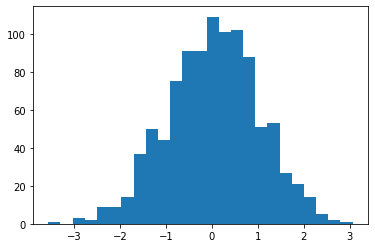

[[-1.10474864]
 [ 0.36800264]
 [-0.06654562]
 [-0.14955838]
 [-0.67219475]
 [-1.00270756]
 [ 1.61847618]
 [-0.03177142]
 [ 0.1344391 ]
 [-0.39576116]]
[[3.]
 [5.]
 [5.]
 [5.]
 [4.]
 [3.]
 [7.]
 [5.]
 [5.]
 [4.]]


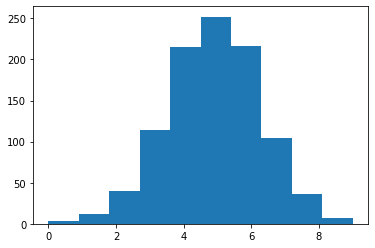

In [ ]:
# demonstration of the discretization transform
from numpy.random import randn
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot
# generate gaussian data sample
data = randn(1000)
# histogram of the data
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# discretization transform the raw data
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data_trans = kbins.fit_transform(data)
# summarize firts few ros
print(data[:10,:])
print(data_trans[:10,:])
# histogram of transformed data
pyplot.hist(data_trans, bins=10)
pyplot.show()

# Sonar Dataset

# Sonar Dataset

(208, 61)
               0           1           2   ...          57          58          59
count  208.000000  208.000000  208.000000  ...  208.000000  208.000000  208.000000
mean     0.029164    0.038437    0.043832  ...    0.007949    0.007941    0.006507
std      0.022991    0.032960    0.038428  ...    0.006470    0.006181    0.005031
min      0.001500    0.000600    0.001500  ...    0.000300    0.000100    0.000600
25%      0.013350    0.016450    0.018950  ...    0.003600    0.003675    0.003100
50%      0.022800    0.030800    0.034300  ...    0.005800    0.006400    0.005300
75%      0.035550    0.047950    0.057950  ...    0.010350    0.010325    0.008525
max      0.137100    0.233900    0.305900  ...    0.044000    0.036400    0.043900

[8 rows x 60 columns]


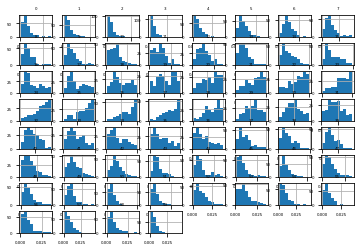

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
# laod dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv', header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

# Uniform Discretization Transform

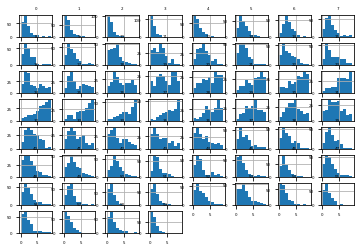

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing  import KBinsDiscretizer
from matplotlib import pyplot

#load dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv', header=None)
data =dataset.values[:, :-1]
# perfomr a uniform discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histogram of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

Evaluate with KNN model for discretization transform of the dataset

In [ ]:
from pandas import read_csv
from numpy import std
from numpy import mean
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# load the dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv', header=None)
data = dataset.values
# sepeerate into input and output columns
X, y = data[:,:-1], data[:,-1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.840 (0.072)
